In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [3]:
n = 1000000
x_data = np.linspace(0.0, 10.0, n)

In [4]:
noise = np.random.randn(len(x_data))

In [5]:
noise

array([ 0.05837128, -0.9603851 ,  0.37655983, ...,  0.53478718,
       -0.9376276 ,  2.72734982])

In [11]:
# y = mx+b where b =5
y_true = (0.5 * x_data) + 5 + noise


In [13]:
x_df = pd.DataFrame(data= x_data, columns=['X data'])
y_df = pd.DataFrame(data= y_true, columns=['Y'])

my_data = pd.concat([x_df, y_df], axis=1)
my_data.head()

,X data,Y
0,0.00000,5.058371
1,0.00001,4.039620
2,0.00002,5.376570
3,0.00003,4.834622
4,0.00004,4.539897


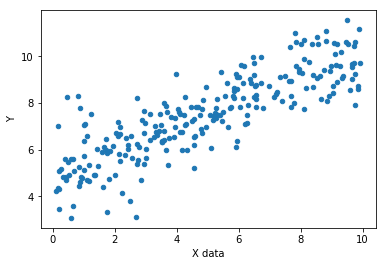

In [14]:
my_data.sample(250).\
    plot(kind='scatter', x="X data", y="Y")

In [15]:
batch_size=8

In [28]:
# Must be float32
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [29]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])


In [30]:
# Graph
y_model = m*xph + b

# Loss function by sum of squares
error = tf.reduce_sum(tf.square(yph-y_model))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)


In [31]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [35]:
y_hat = x_data*model_m + model_b

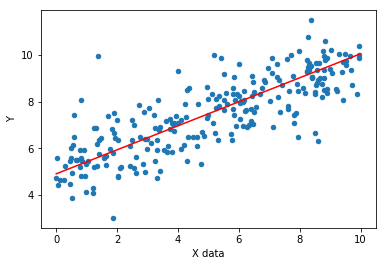

In [38]:
my_data.sample(250).plot(kind='scatter', x="X data", y= "Y")
plt.plot(x_data, y_hat, "r")